## GAM Assignment

### Protein interaction analysis


*About Dataset:* _PPT-Ohmnet_tissues-combined.edgelist_ is a collection of physical protein-proteininteraction networks for alarge number of human tissues. Nodes represent humanproteins and edges representtissue-specific physical interactions between proteins.

In [75]:
#import statements
import pandas as pd
import networkx as nx
import re
import numpy as np;
from IPython.core.display import display
from matplotlib import pyplot as pplt

#### Q1


Create the graph

In [76]:
graph = nx.Graph()

Load the data into the graph

In [77]:
file = open('../data/PPT-Ohmnet_tissues-combined.edgelist')

file.readline()
for line in file.readlines():
    vals = re.split(r'\t', line)
    graph.add_edge(int(vals[0]), int(vals[1]))

Structure of the graph

In [78]:
print(graph)

Graph with 4510 nodes and 70338 edges


Get the largest connected component

In [79]:
largest_connected_component = graph.subgraph(max(nx.connected_components(graph), key=len)).copy()
print(largest_connected_component)

Graph with 4488 nodes and 70316 edges


Calculate the degrees of nodes in largest connected component

In [80]:
degrees = [degree for (node, degree) in largest_connected_component.degree()]
degrees.sort()
maximum  = degrees[len(degrees)-1]

A) 1. Calculate the degree distribution of the largest connected component and plot it.

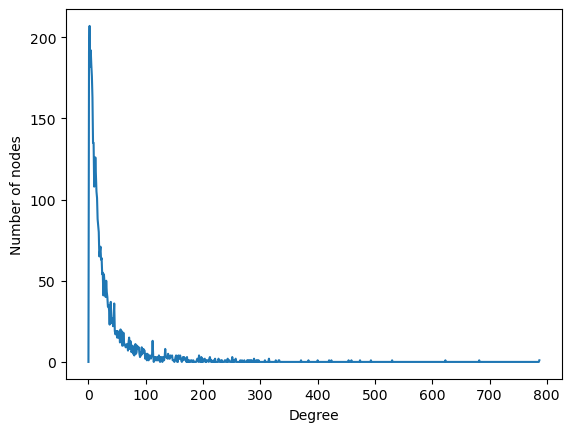

In [81]:
degreeDistribution = np.zeros(maximum+1)
for degree in degrees:
    degreeDistribution[degree] = degreeDistribution[degree]+1
pplt.plot(degreeDistribution)
pplt.xlabel('Degree')
pplt.ylabel('Number of nodes')
pplt.show()

2. Calculate the 5 most connected nodes

In [82]:
nodes = []
deg = []

a= pd.DataFrame()
for  node,degree in largest_connected_component.degree():
    nodes.append(node)
    deg.append(degree)

nodeDegreeDf = pd.DataFrame({'nodes': nodes, 'degree': deg})
nodeDegreeDf.nlargest(5, 'degree')

,nodes,degree
3675,4914,787
138,351,682
2898,1994,623
84,7157,530
29,2885,493


B) 1. Calculate the pagerank(Proteinrank of the nodes)

In [83]:
page_ranks = nx.pagerank(graph)
page_ranks_df = pd.DataFrame({'Nodes': page_ranks.keys(), 'Rank': page_ranks.values()})
top_nodes = page_ranks_df.nlargest(10, ['Rank'])
display(top_nodes)

,Nodes,Rank
138,351,0.005462
3687,4914,0.004784
2908,1994,0.004692
29,2885,0.003226
84,7157,0.003167
1921,7514,0.002958
142,3320,0.002908
352,1956,0.002872
4186,10482,0.002748
100,8452,0.002506


Lowest 10

In [84]:
bottom_nodes = page_ranks_df.nsmallest(10, ['Rank'])
display(bottom_nodes)

,Nodes,Rank
4334,90665,0.000038
2894,22846,0.000038
1649,55604,0.000038
3847,151887,0.000038
2741,79918,0.000038
2787,11132,0.000038
2819,7482,0.000038
2756,3359,0.000038
4014,3890,0.000038
3253,1002,0.000038



B) 2. Betweenness Centrality(Top 10)

In [85]:
between_centrality = nx.betweenness_centrality(graph.subgraph(top_nodes['Nodes']))
between_centrality_df = pd.DataFrame({'Nodes': between_centrality.keys(), 'Betweenness Centrality': between_centrality.values()})
between_centrality_df

,Nodes,Betweenness Centrality
0,1956,0.057870
1,2885,0.040278
2,8452,0.077315
3,1994,0.043981
4,4914,0.033333
5,10482,0.006944
6,7157,0.012500
7,3320,0.150463
8,7514,0.070370
9,351,0.006944



B) 2. Betweenness Centrality(Bottom 10)

In [86]:
between_centrality = nx.betweenness_centrality(graph.subgraph(bottom_nodes['Nodes']))
between_centrality_df = pd.DataFrame({'Nodes': between_centrality.keys(), 'Betweenness Centrality': between_centrality.values()})
between_centrality_df

,Nodes,Betweenness Centrality
0,90665,0.0
1,1002,0.0
2,79918,0.0
3,151887,0.0
4,3890,0.0
5,55604,0.0
6,7482,0.0
7,11132,0.0
8,22846,0.0
9,3359,0.0


B) 3. Closeness Centrality(Top 10)

In [87]:
closeness_centrality = nx.closeness_centrality(graph.subgraph(top_nodes['Nodes']))
closeness_centrality_df = pd.DataFrame({'Nodes': between_centrality.keys(), 'Closeness Centrality': closeness_centrality.values()})
closeness_centrality_df

,Nodes,Closeness Centrality
0,90665,0.750000
1,1002,0.750000
2,79918,0.750000
3,151887,0.692308
4,3890,0.750000
5,55604,0.600000
6,7482,0.642857
7,11132,0.900000
8,22846,0.750000
9,3359,0.642857


B) 3. Closeness Centrality(Bottom 10)

In [88]:
closeness_centrality = nx.closeness_centrality(graph.subgraph(bottom_nodes['Nodes']))
closeness_centrality_df = pd.DataFrame({'Nodes': between_centrality.keys(), 'Closeness Centrality': closeness_centrality.values()})
closeness_centrality_df

,Nodes,Closeness Centrality
0,90665,0.0
1,1002,0.0
2,79918,0.0
3,151887,0.0
4,3890,0.0
5,55604,0.0
6,7482,0.0
7,11132,0.0
8,22846,0.0
9,3359,0.0


B) 4. Eigenvector centrality(top 10)

In [89]:
eigenvector_centrality = nx.eigenvector_centrality(graph.subgraph(top_nodes['Nodes']))
eigenvector_centrality_df = pd.DataFrame({'Nodes': eigenvector_centrality.keys(), 'Eigenvector Centrality': eigenvector_centrality.values()})
eigenvector_centrality_df

,Nodes,Eigenvector Centrality
0,1956,0.343987
1,2885,0.350634
2,8452,0.327417
3,1994,0.282669
4,4914,0.361089
5,10482,0.188953
6,7157,0.241660
7,3320,0.421317
8,7514,0.324034
9,351,0.254226


Eigenvector centrality(top 10)

In [90]:
eigenvector_centrality = nx.eigenvector_centrality(graph.subgraph(bottom_nodes['Nodes']))
eigenvector_centrality_df = pd.DataFrame({'Nodes': eigenvector_centrality.keys(), 'Eigenvector Centrality': eigenvector_centrality.values()})
eigenvector_centrality_df

,Nodes,Eigenvector Centrality
0,90665,0.316228
1,1002,0.316228
2,79918,0.316228
3,151887,0.316228
4,3890,0.316228
5,55604,0.316228
6,7482,0.316228
7,11132,0.316228
8,22846,0.316228
9,3359,0.316228
